In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/creditcard.csv")

In [4]:
df = df.dropna()

In [5]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)

In [9]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [10]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

In [11]:
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_poly = accuracy_score(y_test, y_pred_poly)

In [12]:
print("SVM Linear Accuracy:", acc_linear)
print("SVM RBF Accuracy:", acc_rbf)
print("SVM Polynomial Accuracy:", acc_poly)

SVM Linear Accuracy: 0.9991940288047096
SVM RBF Accuracy: 0.9995794932894138
SVM Polynomial Accuracy: 0.9995794932894138


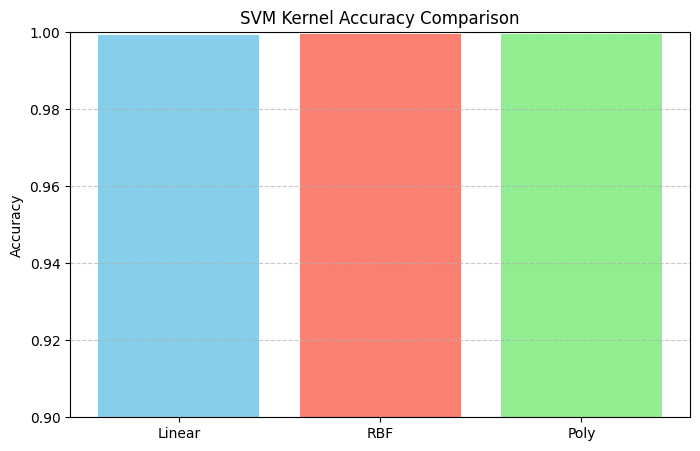

In [13]:
plt.figure(figsize=(8,5))
plt.bar(["Linear", "RBF", "Poly"], [acc_linear, acc_rbf, acc_poly], color=["skyblue", "salmon", "lightgreen"])
plt.title("SVM Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
sample_indices = np.random.choice(len(X_pca), 5000, replace=False)
X_vis = X_pca[sample_indices]
y_vis = y.values[sample_indices]

In [17]:
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_vis, y_vis)
y_pred_vis = svm_vis.predict(X_vis)

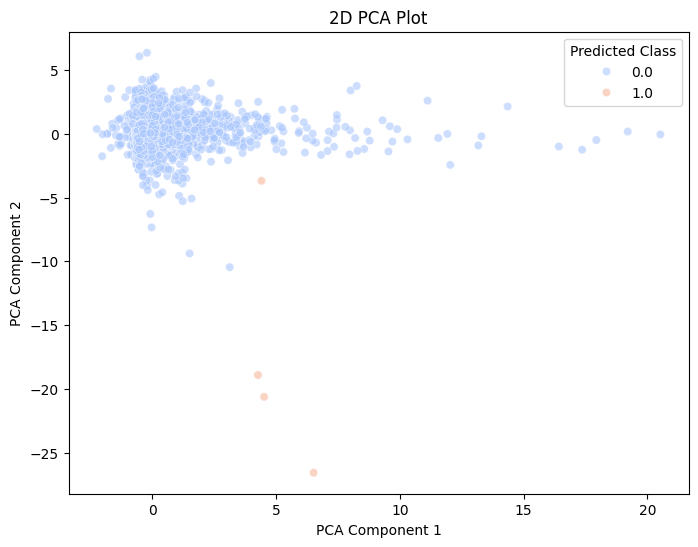

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_pred_vis, palette="coolwarm", alpha=0.6)
plt.title("2D PCA Plot")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Class")
plt.show()